In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime

# Importing data

In [3]:
train_df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [4]:
print(train_df.shape)
print(test_df.shape)
train_df.columns
train_df.info()

(39211, 16)
(10000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), obj

In [5]:
train_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [6]:
train_df.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no
39210,2010-03-16,51,student,divorced,tertiary,yes,38594,yes,no,cellular,1877,19,780,148,success,yes


# EDA

In [7]:
train_df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [8]:
train_df.nunique()

last contact date    1013
age                    78
job                    11
marital                 3
education               3
default                 2
balance              9535
housing                 2
loan                    2
contact                 2
duration             3146
campaign               63
pdays                 865
previous              276
poutcome                3
target                  2
dtype: int64

*This is a Binary Classification Problem*

*Changing some objects to Binary Value like 'default', 'housing','loan', and 'target'*

In [9]:
for column in ['default', 'housing', 'loan', 'target']:
  train_df[column] = train_df[column].map({'yes': 1, 'no': 0})

print(train_df.head()) 

  last contact date  age           job  marital  education  default  balance  \
0        2009-04-17   26   blue-collar  married  secondary        0      647   
1        2009-10-11   52    technician  married  secondary        0      553   
2        2010-11-20   44   blue-collar  married  secondary        0     1397   
3        2009-09-01   33        admin.  married  secondary        0      394   
4        2008-01-29   31  entrepreneur   single   tertiary        0      137   

   housing  loan    contact  duration  campaign  pdays  previous poutcome  \
0        1     0   cellular       357         2    331         1    other   
1        1     0  telephone       160         1     -1         0      NaN   
2        0     0   cellular       326         1     -1         0      NaN   
3        1     0  telephone       104         3     -1         0      NaN   
4        0     0   cellular       445         2     -1         0      NaN   

   target  
0       0  
1       0  
2       0  
3       

*There are 16 features and 39210 datapoints*

*7 numeric, 4 binary, and 5 categorical* 

**sort by last contact date ascending**

In [10]:
train_df['last contact date'] = pd.to_datetime(train_df['last contact date'])
train_df = train_df.sort_values('last contact date', ascending=True)
print(train_df.head())
print(train_df.tail())

      last contact date  age            job   marital  education  default  \
15437        2008-01-01   43        student   married  secondary        0   
13993        2008-01-01   71        student    single  secondary        1   
17318        2008-01-01   66  self-employed   married  secondary        1   
22407        2008-01-01   67  self-employed    single   tertiary        0   
4251         2008-01-01   25      housemaid  divorced   tertiary        1   

       balance  housing  loan    contact  duration  campaign  pdays  previous  \
15437    73150        1     1  telephone      4383        34    726       170   
13993    98914        1     1  telephone      4777         7    133       237   
17318    97558        0     0  telephone      2054        39    827       129   
22407    30571        0     0   cellular      1913        15     43       239   
4251     70239        1     0   cellular       673        14    117       188   

      poutcome  target  
15437  success       1  


In [11]:
train_df['target'].value_counts()

target
0    33384
1     5827
Name: count, dtype: int64

In [12]:
train_df['target'].value_counts()/len(train_df)*100

target
0    85.139374
1    14.860626
Name: count, dtype: float64

*Here, we can see that out of 100 percent only 14.86% bought the product*

**The dataset is highly imbalanced** 

In [13]:
train_df.isna().sum()*100/len(train_df)

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

**Here, 75% of null values found in poutcome and 26% null values found in contact.**

#  Visualization

*Doing simple imputation to know about the dataset visually*

In [14]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the specified columns
train_df[['job', 'education', 'contact']] = imputer.fit_transform(train_df[['job', 'education', 'contact']])

In [15]:
train_df['poutcome'] = train_df['poutcome'].fillna('unknown')

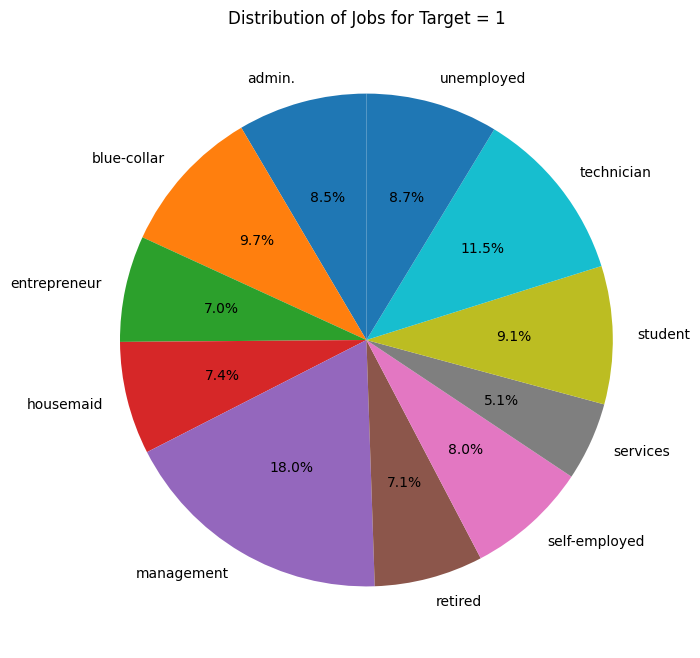

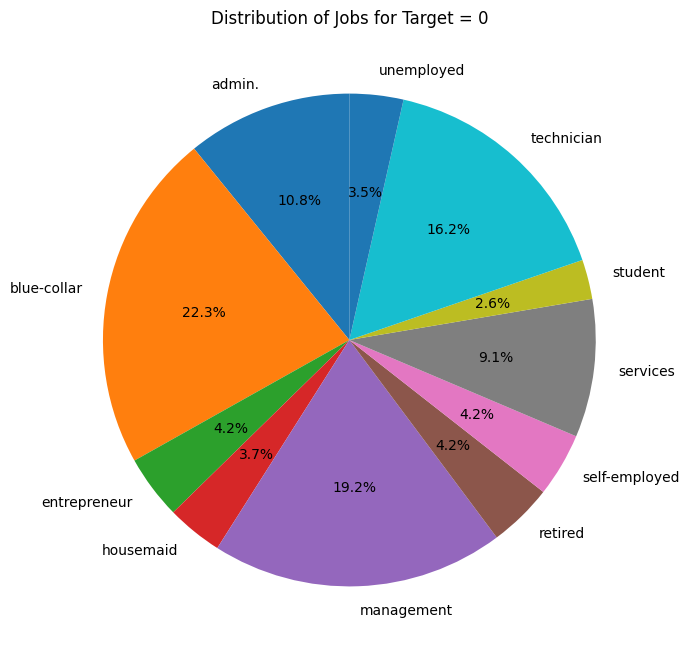

In [16]:
job_target_crosstab = pd.crosstab(train_df['job'], train_df['target'])

# Plot the pie chart for 'target' = 1
job_target1 = job_target_crosstab[1]
plt.figure(figsize=(8, 8))
plt.pie(job_target1, labels=job_target1.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Jobs for Target = 1')
plt.show()

# Plot the pie chart for 'target' = 0
job_target0 = job_target_crosstab[0]
plt.figure(figsize=(8, 8))
plt.pie(job_target0, labels=job_target0.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Jobs for Target = 0')
plt.show()

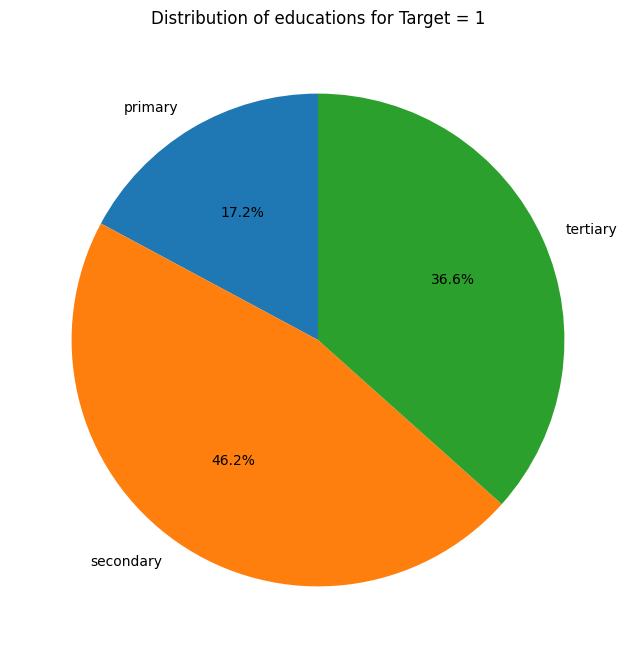

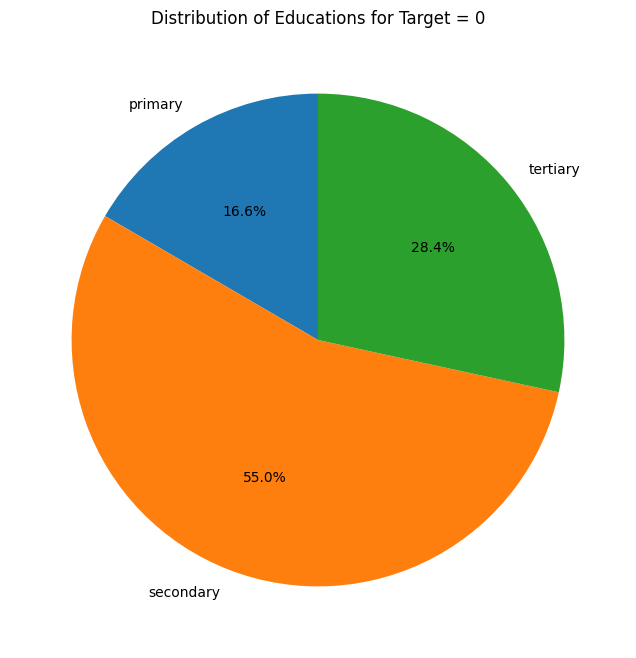

In [17]:
education_target_crosstab = pd.crosstab(train_df['education'], train_df['target'])

# Plot the pie chart for 'target' = 1
education_target1 = education_target_crosstab[1]
plt.figure(figsize=(8, 8))
plt.pie(education_target1, labels=education_target1.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of educations for Target = 1')
plt.show()

# Plot the pie chart for 'target' = 0
education_target0 = education_target_crosstab[0]
plt.figure(figsize=(8, 8))
plt.pie(education_target0, labels=education_target0.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Educations for Target = 0')
plt.show()

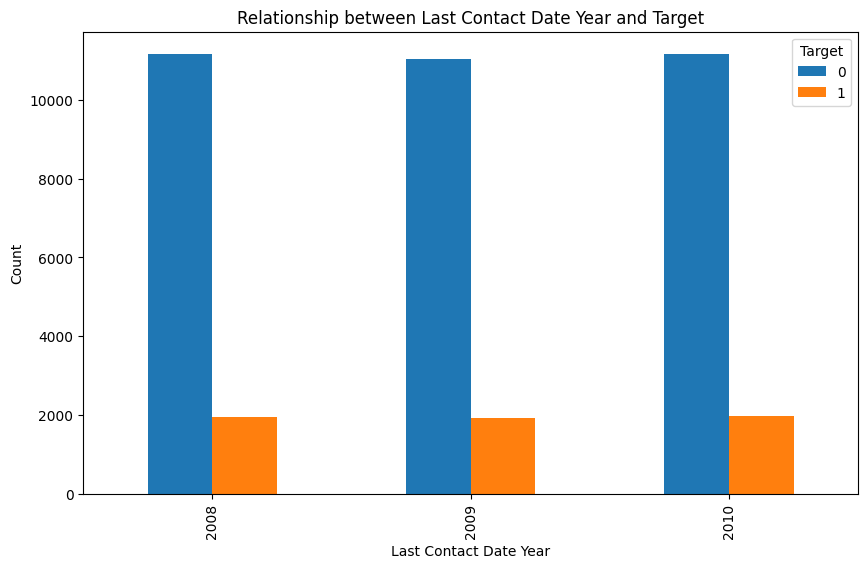

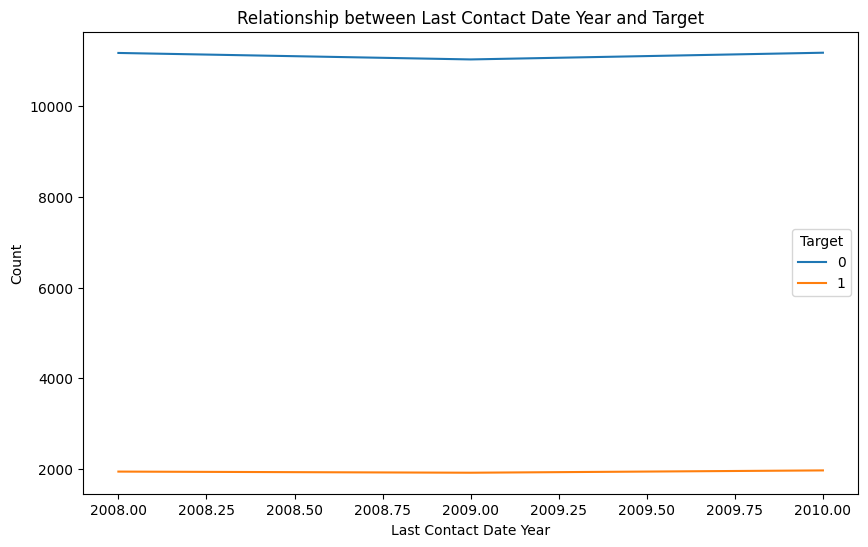

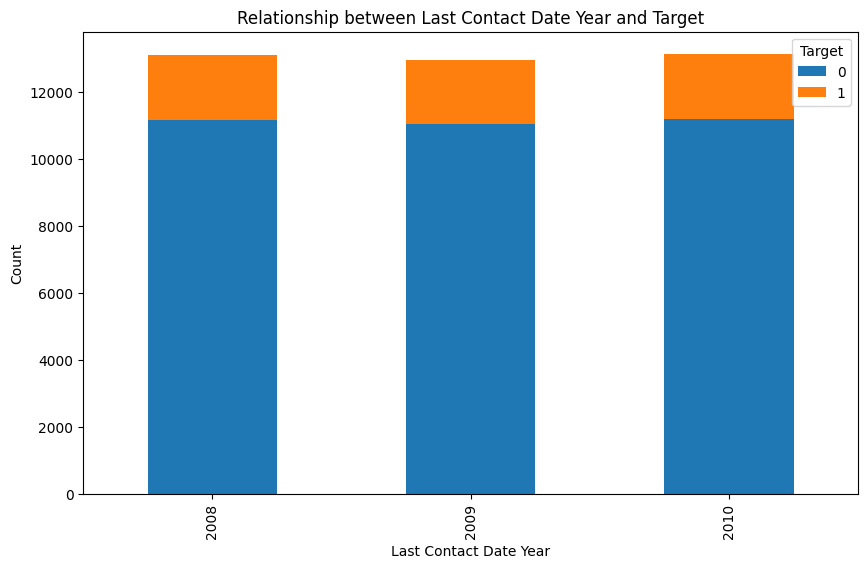

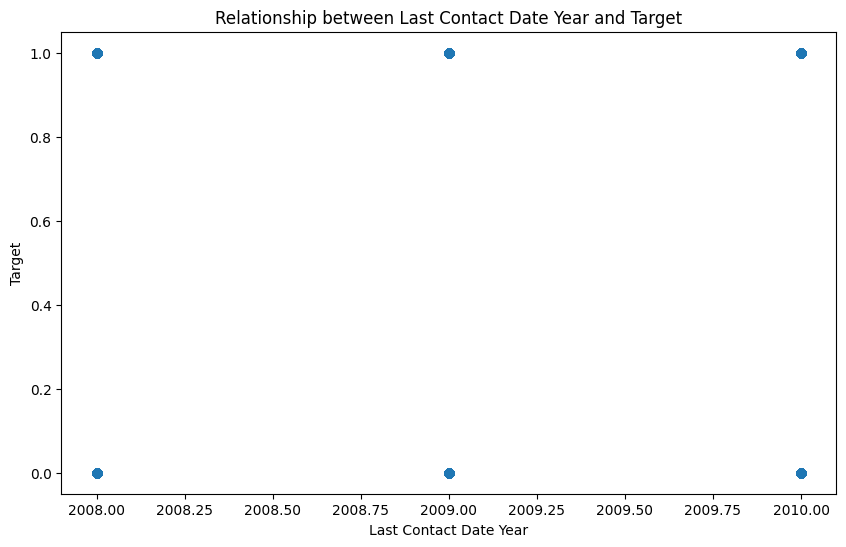

In [18]:
# Extract the year from the 'last contact date' colum
train_df['last_contact_year'] = pd.to_datetime(train_df['last contact date']).dt.year

# Group by 'last_contact_year' and 'target' and count the occurrences
year_target_counts = train_df.groupby(['last_contact_year', 'target'])['target'].count().unstack()

# Plot the relationship between 'last_contact_year' and 'target'
year_target_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Last Contact Date Year and Target')
plt.xlabel('Last Contact Date Year')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

# Other chart options
# Create a line chart
year_target_counts.plot(kind='line', figsize=(10, 6))
plt.title('Relationship between Last Contact Date Year and Target')
plt.xlabel('Last Contact Date Year')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


# Create a stacked bar chart
year_target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship between Last Contact Date Year and Target')
plt.xlabel('Last Contact Date Year')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['last_contact_year'], train_df['target'])
plt.title('Relationship between Last Contact Date Year and Target')
plt.xlabel('Last Contact Date Year')
plt.ylabel('Target')
plt.show()

Relationship between Last Contact Month and Target = 1:
last_contact_month
1      6.898919
2      6.126652
3      9.095589
4      7.671186
5     12.699502
6      7.396602
7      8.632229
8      9.679080
9      9.026944
10    10.228248
11     5.388708
12     7.156341
Name: 1, dtype: float64



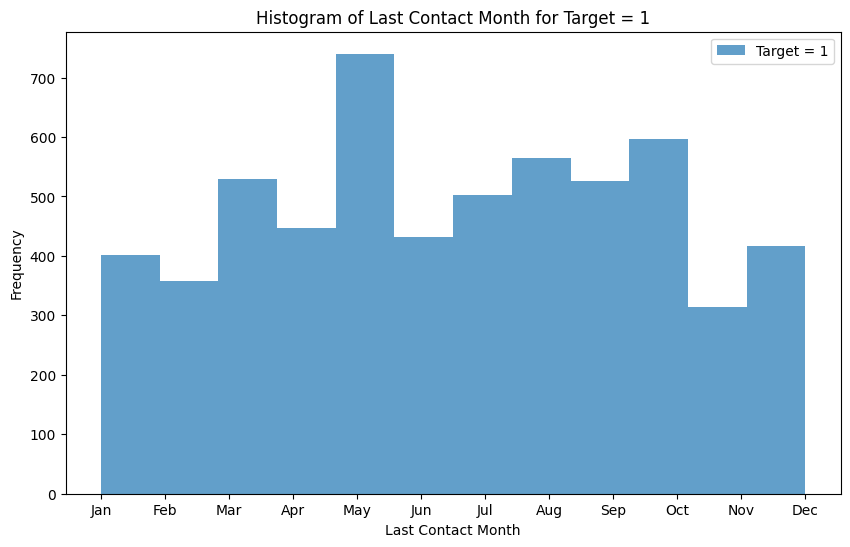

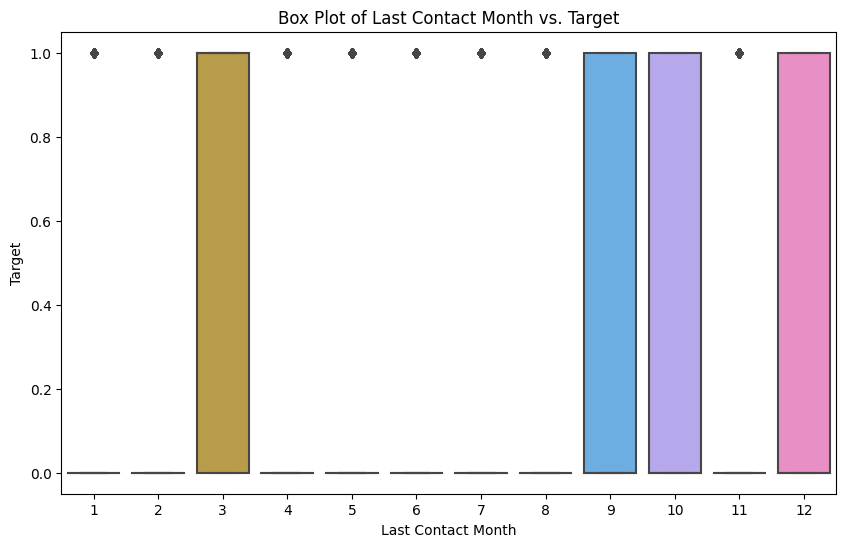

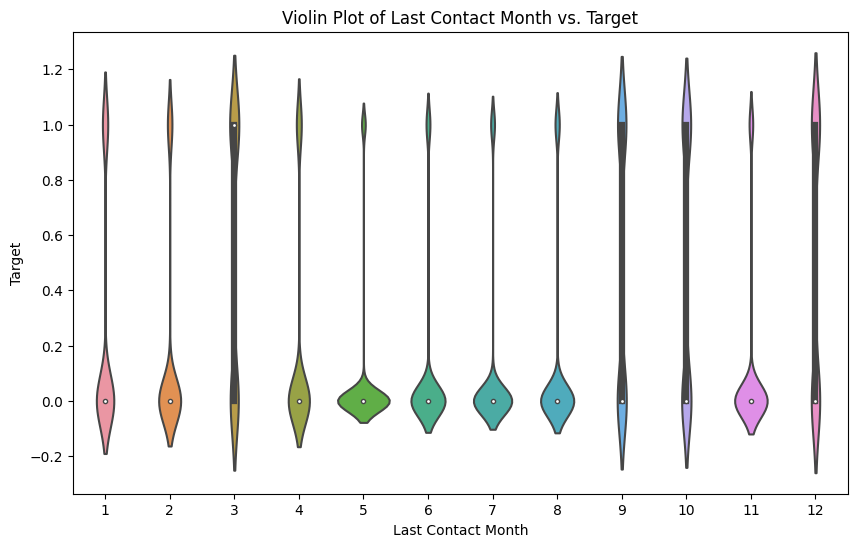

In [19]:
# Extract the month from 'last contact date'
train_df['last_contact_month'] = pd.to_datetime(train_df['last contact date']).dt.month

# Analyze 'last contact month' and 'target' relationship
target_month_crosstab = pd.crosstab(train_df['target'], train_df['last_contact_month'], normalize='index') * 100

# Extract the relationship for target = 1
month_target1_relationship = target_month_crosstab.loc[1]

print(f"Relationship between Last Contact Month and Target = 1:\n{month_target1_relationship}\n")


# Plot the relationship using a histogram
plt.figure(figsize=(10, 6))
plt.hist(train_df[train_df['target'] == 1]['last_contact_month'], bins=12, alpha=0.7, label='Target = 1')
plt.xlabel('Last Contact Month')
plt.ylabel('Frequency')
plt.title('Histogram of Last Contact Month for Target = 1')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

# Analyze 'last contact month' and 'target' relationship
target_month_crosstab = pd.crosstab(train_df['target'], train_df['last_contact_month'], normalize='index') * 100



# Plot the relationship using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='last_contact_month', y='target', data=train_df)
plt.xlabel('Last Contact Month')
plt.ylabel('Target')
plt.title('Box Plot of Last Contact Month vs. Target')
plt.show()

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='last_contact_month', y='target', data=train_df)
plt.xlabel('Last Contact Month')
plt.ylabel('Target')
plt.title('Violin Plot of Last Contact Month vs. Target')
plt.show()


Analyzing relationship between 'job' and 'target':
target                 0          1
job                                
admin.         87.998056  12.001944
blue-collar    92.954403   7.045597
entrepreneur   77.506925  22.493075
housemaid      73.973430  26.026570
management     85.928705  14.071295
retired        77.192982  22.807018
self-employed  75.080559  24.919441
services       90.977444   9.022556
student        62.096195  37.903805
technician     89.009543  10.990457
unemployed     69.970326  30.029674


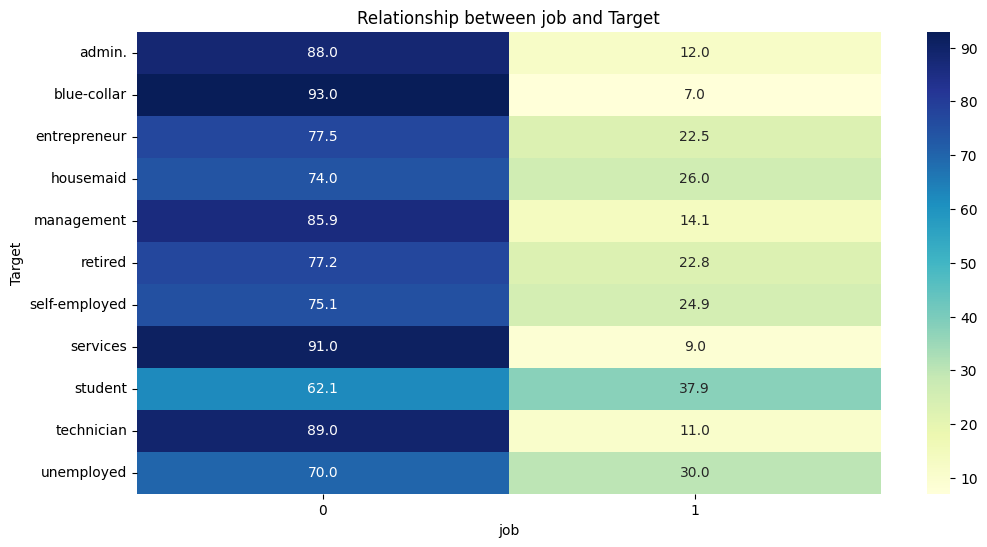


Analyzing relationship between 'marital' and 'target':
target            0          1
marital                       
divorced  79.582543  20.417457
married   88.184743  11.815257
single    81.600000  18.400000


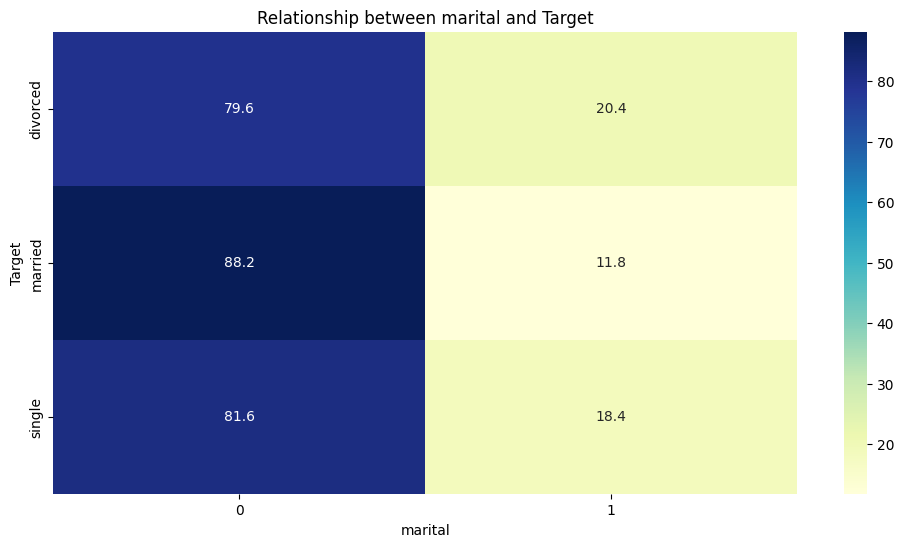


Analyzing relationship between 'education' and 'target':
target             0          1
education                      
primary    84.721161  15.278839
secondary  87.202508  12.797492
tertiary   81.635816  18.364184


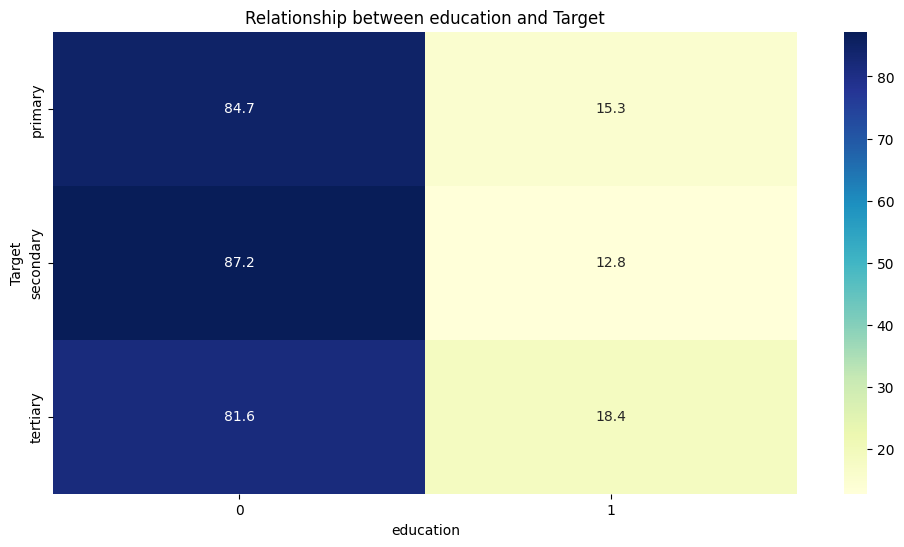


Analyzing relationship between 'default' and 'target':
target           0          1
default                      
0        86.540023  13.459977
1        62.206469  37.793531


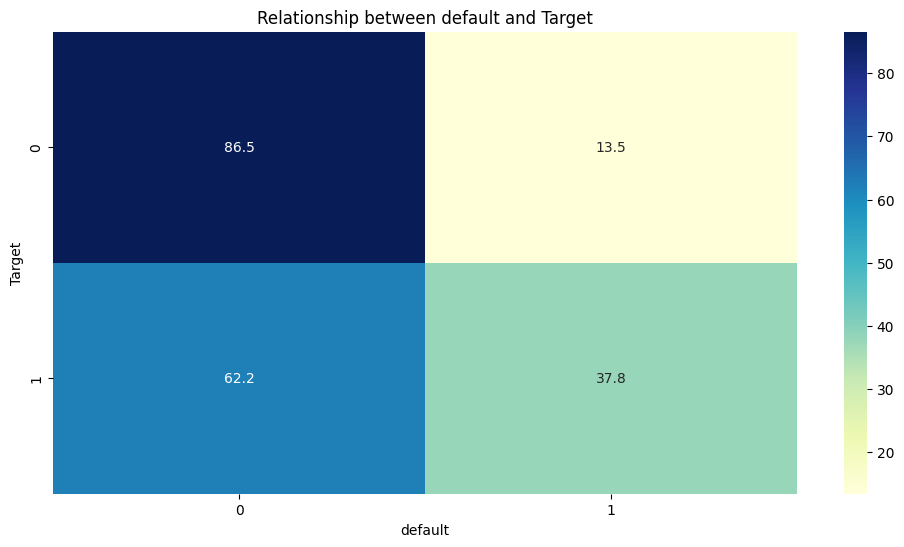


Analyzing relationship between 'housing' and 'target':
target           0          1
housing                      
0        80.033041  19.966959
1        89.278293  10.721707


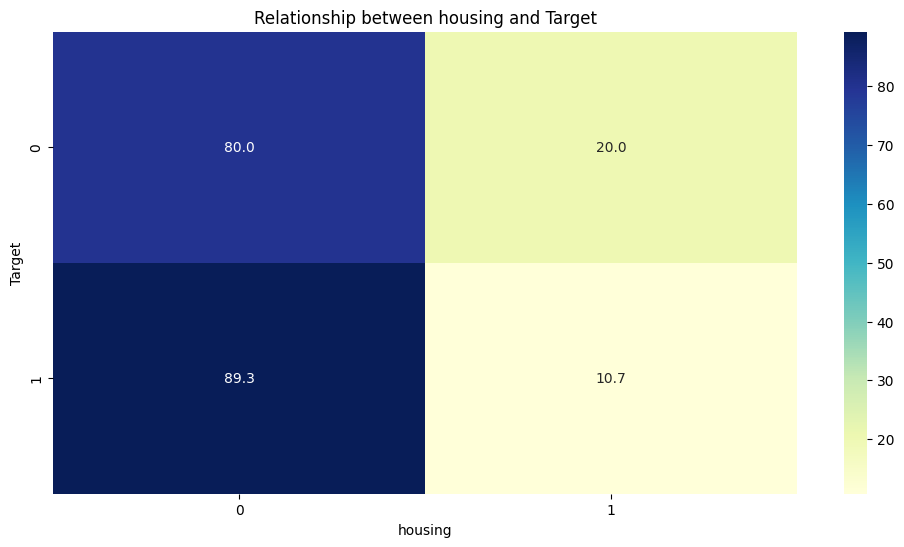


Analyzing relationship between 'loan' and 'target':
target          0          1
loan                        
0       85.515399  14.484601
1       83.520498  16.479502


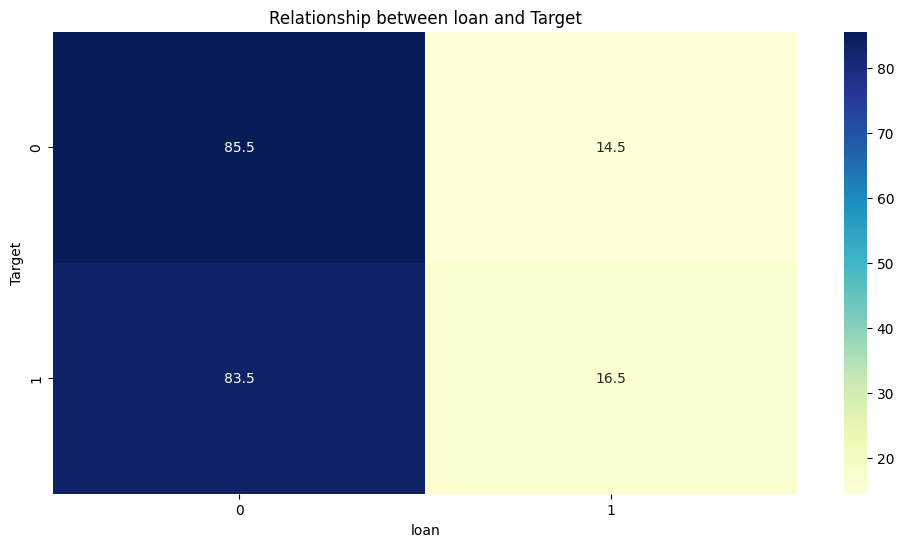


Analyzing relationship between 'contact' and 'target':
target             0          1
contact                        
cellular   86.583159  13.416841
telephone  71.859558  28.140442


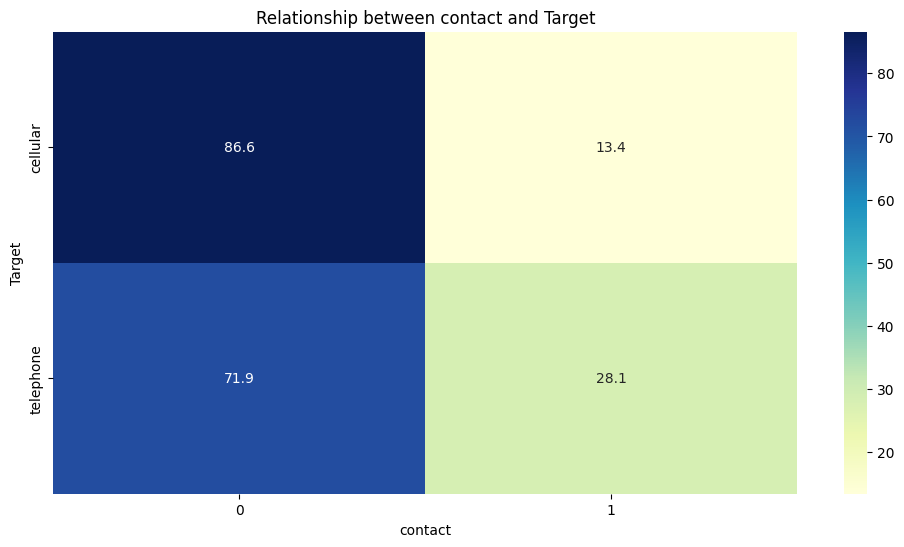


Analyzing relationship between 'poutcome' and 'target':
target            0          1
poutcome                      
failure   80.117195  19.882805
other     68.945312  31.054688
success   41.359396  58.640604
unknown   90.737157   9.262843


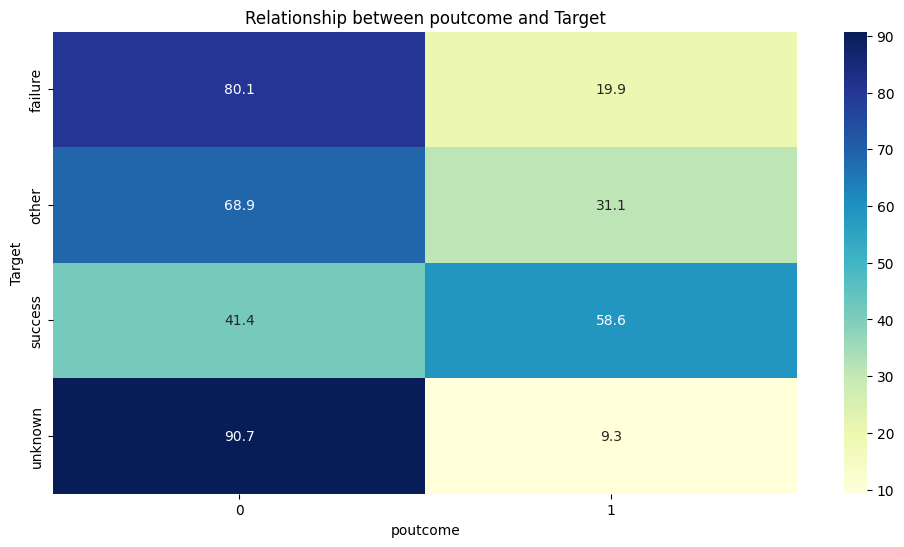

target            0          1
marital                       
divorced  79.582543  20.417457
married   88.184743  11.815257
single    81.600000  18.400000


<Figure size 800x600 with 0 Axes>

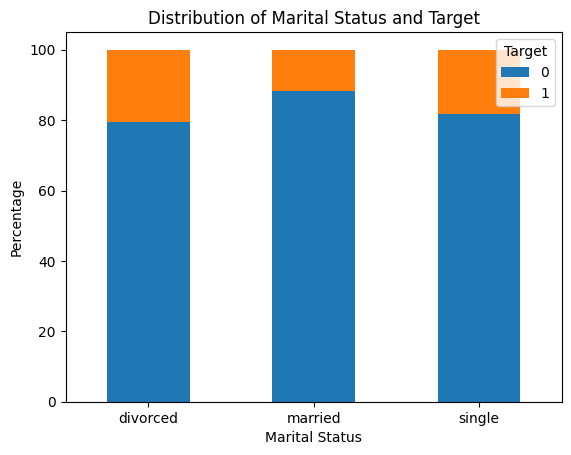

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

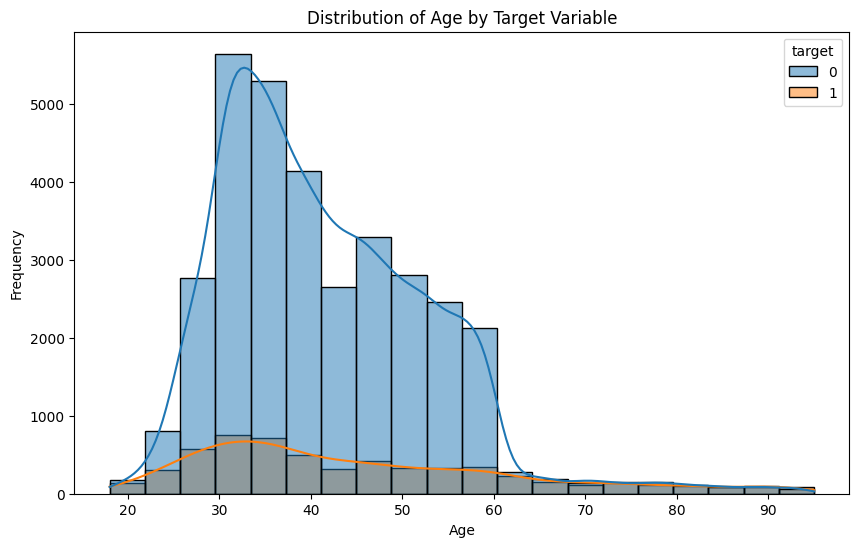

age_range     15-19     20-24      25-29      30-34      35-39      40-44  \
target                                                                      
0          0.308531  2.609034  12.104601  21.381500  17.095016  13.365684   
1          1.544534  6.092329  13.197186  15.702763  12.596533   9.353012   

age_range      45-49     50-54     55-59     60-64     65-69     70-74  \
target                                                                   
0          11.544452  9.702253  8.120657  0.997484  0.676971  0.563144   
1           8.323322  7.036211  7.104857  4.221726  3.329329  3.071907   

age_range     75-79     80-84     85-89     90-94  
target                                             
0          0.536185  0.410376  0.341481  0.242631  
1          2.471255  2.007894  2.076540  1.870602  


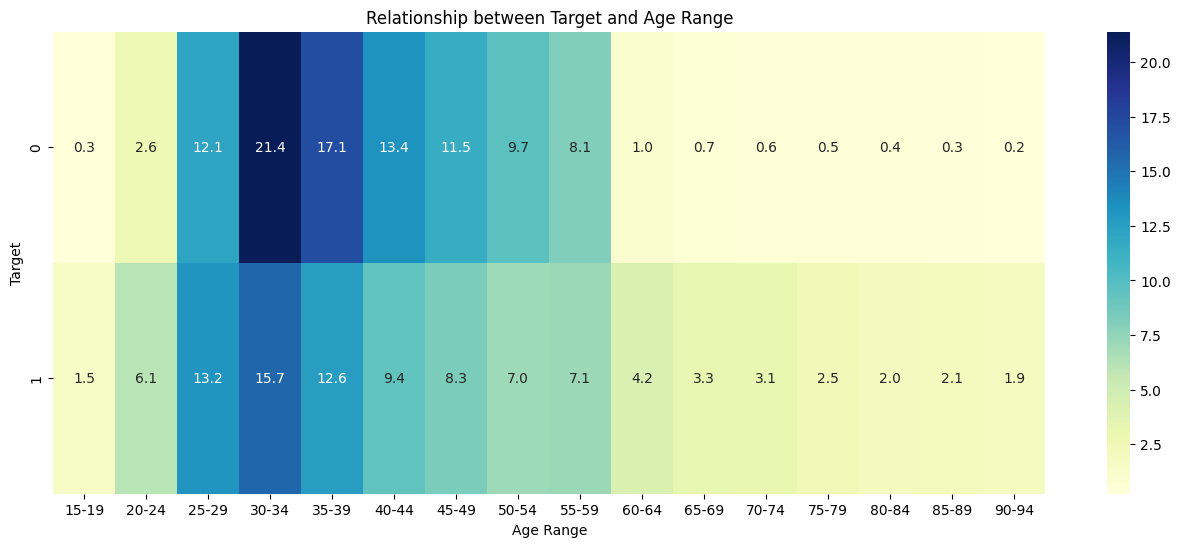

duration_range      0-499    500-999  1000-1499  1500-1999  2000-2499  \
target                                                                  
0               88.395639   6.772705   1.267074   0.653007   0.482267   
1               43.950575  25.261713   9.147074   4.513472   3.363652   

duration_range  2500-2999  3000-3499  3500-3999  4000-4499  4500-4999  
target                                                                 
0                0.506231   0.479272   0.542176   0.485262   0.416367  
1                2.951776   3.003261   2.745838   2.711515   2.351124  


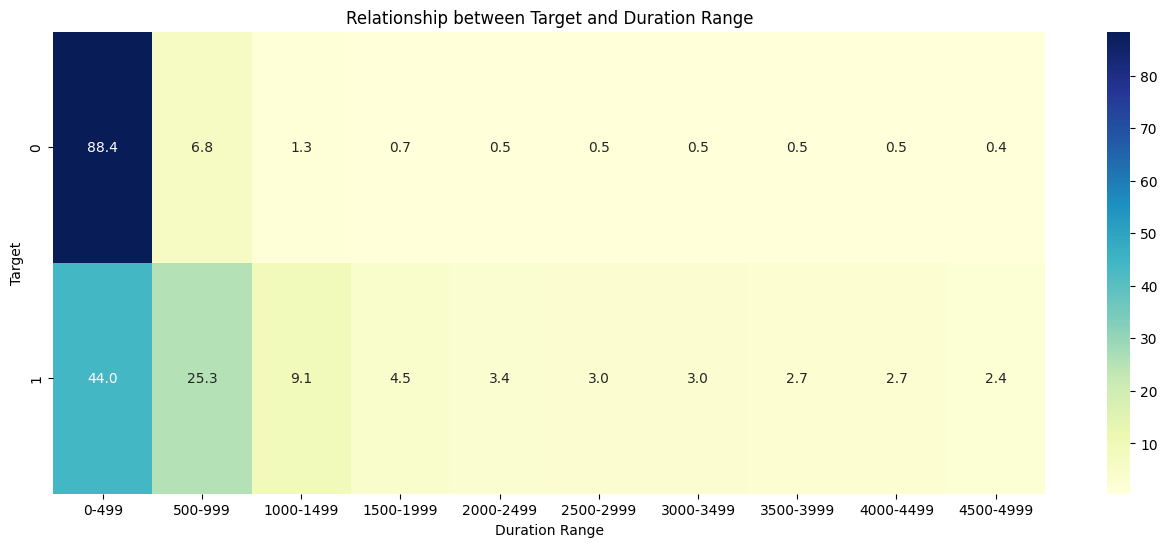

pdays_range       -1-8      9-18     19-28     29-38     39-48     49-58  \
target                                                                     
0            80.310927  0.116822  0.107836  0.116822  0.095854  0.107836   
1            47.314227  0.463360  0.446199  0.326068  0.463360  0.343230   

pdays_range     59-68     69-78     79-88     89-98  ...   779-788   789-798  \
target                                               ...                       
0            0.131800  0.173736  0.389408  0.931584  ...  0.050923  0.041936   
1            0.583491  0.652137  1.836279  5.886391  ...  0.411876  0.377553   

pdays_range   799-808   809-818   819-828   829-838   839-848   849-858  \
target                                                                    
0            0.077882  0.041936  0.062904  0.029954  0.044932  0.047927   
1            0.497683  0.343230  0.308907  0.274584  0.394714  0.308907   

pdays_range   859-868   869-878  
target                           
0    

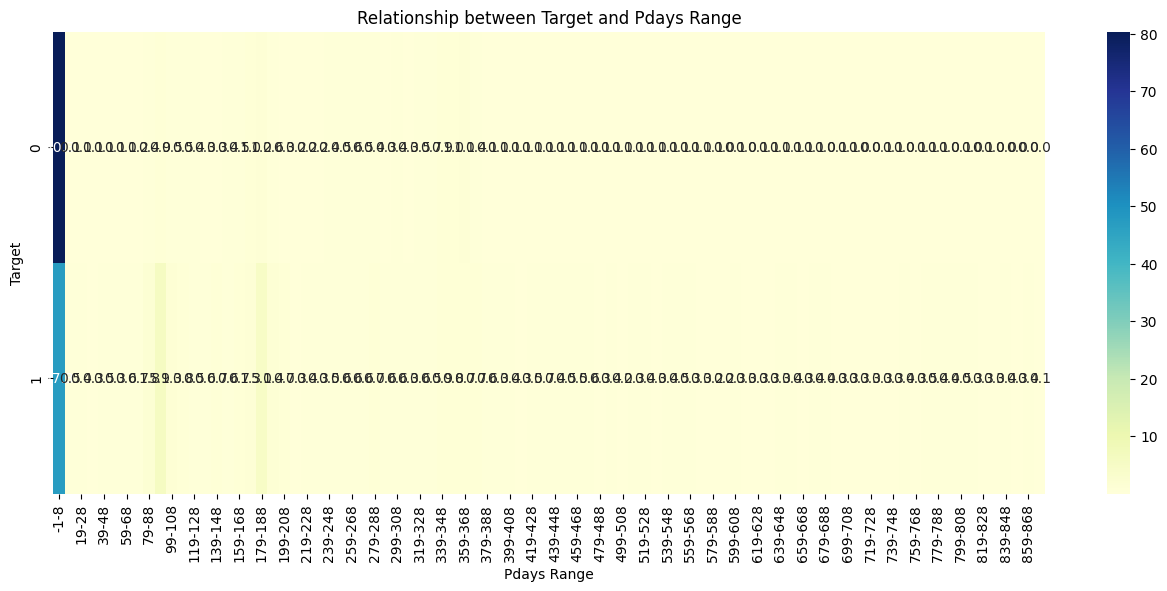


Percentage of clients not previously contacted (pdays=-1) by target:
target
0    80.038342
1    46.782221
Name: pdays, dtype: float64


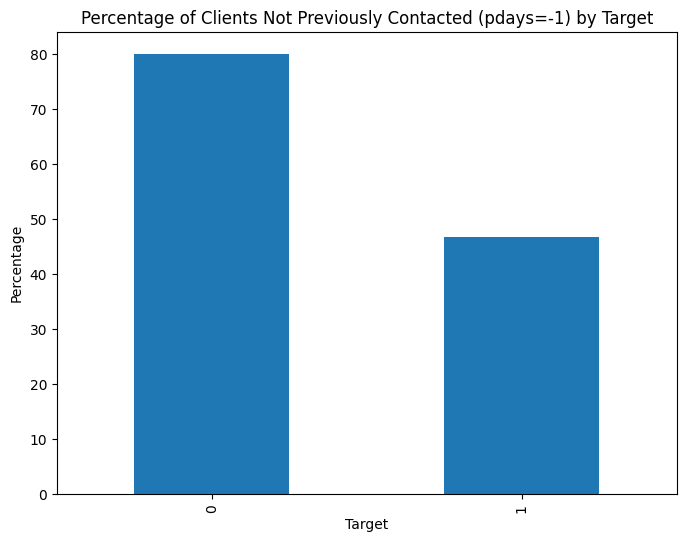

previous_range        0-9     10-19     20-29     30-39     40-49     50-59  \
target                                                                        
0               94.898754  0.599089  0.263599  0.194704  0.161754  0.167745   
1               72.610263  1.647503  0.943882  1.012528  0.875236  0.995366   

previous_range     60-69     70-79     80-89     90-99  ...   180-189  \
target                                                  ...             
0               0.143781  0.200695  0.170740  0.218668  ...  0.206686   
1               0.978205  1.064012  0.909559  1.218466  ...  0.909559   

previous_range   190-199   200-209   210-219   220-229   230-239   240-249  \
target                                                                       
0               0.206686  0.188713  0.197699  0.146777  0.134795  0.140786   
1               0.978205  0.995366  0.858074  1.201304  1.098335  0.840913   

previous_range   250-259   260-269   270-279  
target                        

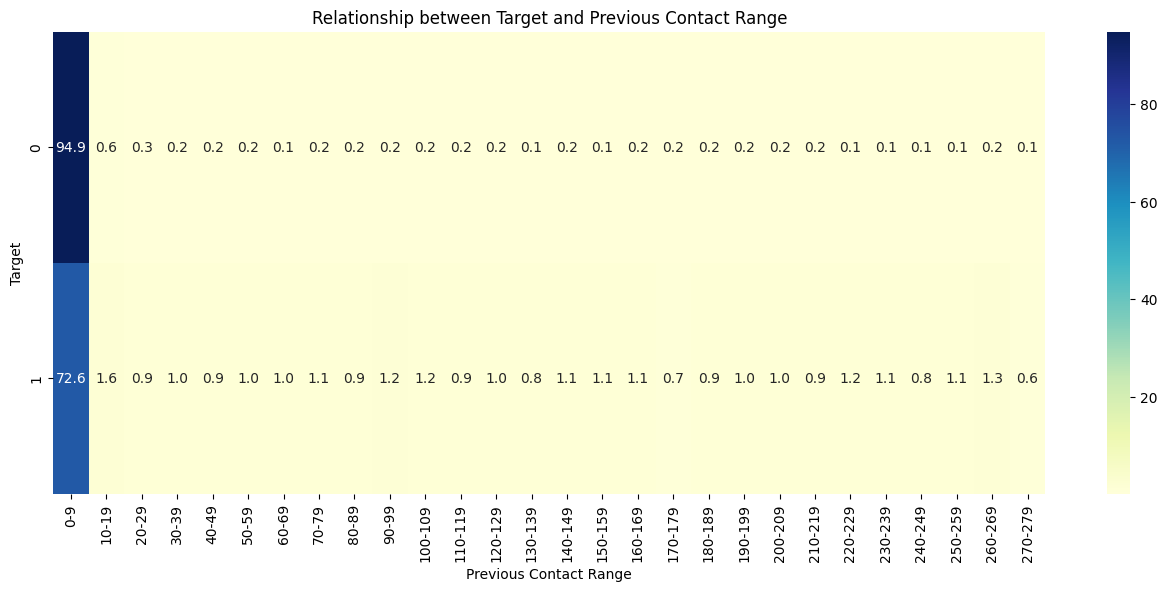

In [20]:
columns_to_analyze = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'poutcome']

# Create a loop to analyze relationships for each column with the target
for column in columns_to_analyze:
  print(f"\nAnalyzing relationship between '{column}' and 'target':")

  # Create a cross-tabulation to examine the relationship between the column and 'target'
  crosstab = pd.crosstab(train_df[column], train_df['target'], normalize='index') * 100

  print(crosstab)

  # Plot the relationship using a heatmap
  plt.figure(figsize=(12, 6))
  sns.heatmap(crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
  plt.title(f"Relationship between {column} and Target")
  plt.xlabel(column)
  plt.ylabel("Target")
  plt.show()


marital_target_crosstab = pd.crosstab(train_df['marital'], train_df['target'], normalize='index') * 100

print(marital_target_crosstab)

# Plot the relationship using a bar chart
plt.figure(figsize=(8, 6))
marital_target_crosstab.plot(kind='bar', stacked=True)  # Use stacked=True for stacked bars
plt.title('Distribution of Marital Status and Target')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.legend(title='Target')
plt.show()


  # relationship between age and target
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='target', data=train_df, bins=20, kde=True)  # Adjust bins as needed
plt.title('Distribution of Age by Target Variable')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
  # Create age ranges with an interval of 5
bins = range(0, 101, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]
train_df['age_range'] = pd.cut(train_df['age'], bins=bins, labels=labels, include_lowest=True)

# Analyze the relationship between age range and target
target_age_crosstab = pd.crosstab(train_df['target'], train_df['age_range'], normalize='index') * 100

print(target_age_crosstab)

# Plot the relationship using a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(target_age_crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between Target and Age Range")
plt.xlabel("Age Range")
plt.ylabel("Target")
plt.show()

# find relationship between target and duration and for duration make it as range with an interval of 500.

# Create duration ranges with an interval of 500
bins = range(0, train_df['duration'].max() + 500, 500)
labels = [f"{i}-{i+499}" for i in bins[:-1]]
train_df['duration_range'] = pd.cut(train_df['duration'], bins=bins, labels=labels, include_lowest=True)

# Analyze the relationship between duration range and target
target_duration_crosstab = pd.crosstab(train_df['target'], train_df['duration_range'], normalize='index') * 100

print(target_duration_crosstab)

# Plot the relationship using a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(target_duration_crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between Target and Duration Range")
plt.xlabel("Duration Range")
plt.ylabel("Target")
plt.show()

# relationship between pdays and target
# Create pdays ranges with an interval of 10
bins = range(-1, train_df['pdays'].max() + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
train_df['pdays_range'] = pd.cut(train_df['pdays'], bins=bins, labels=labels, include_lowest=True)

# Analyze the relationship between pdays range and target
target_pdays_crosstab = pd.crosstab(train_df['target'], train_df['pdays_range'], normalize='index') * 100

print(target_pdays_crosstab)

# Plot the relationship using a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(target_pdays_crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between Target and Pdays Range")
plt.xlabel("Pdays Range")
plt.ylabel("Target")
plt.show()

# Analyze the relationship between pdays (-1 means not contacted) and target
target_pdays_not_contacted = train_df.groupby(['target'])['pdays'].apply(lambda x: (x == -1).mean() * 100)
print(f"\nPercentage of clients not previously contacted (pdays=-1) by target:\n{target_pdays_not_contacted}")

# You can further visualize this with a bar chart:
plt.figure(figsize=(8, 6))
target_pdays_not_contacted.plot(kind='bar')
plt.title("Percentage of Clients Not Previously Contacted (pdays=-1) by Target")
plt.xlabel("Target")
plt.ylabel("Percentage")
plt.show()

#relationship between previous and target

# Create previous ranges with an interval of 10
bins = range(0, train_df['previous'].max() + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
train_df['previous_range'] = pd.cut(train_df['previous'], bins=bins, labels=labels, include_lowest=True)

# Analyze the relationship between previous range and target
target_previous_crosstab = pd.crosstab(train_df['target'], train_df['previous_range'], normalize='index') * 100

print(target_previous_crosstab)

# Plot the relationship using a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(target_previous_crosstab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Relationship between Target and Previous Contact Range")
plt.xlabel("Previous Contact Range")
plt.ylabel("Target")
plt.show()

# Summary

Based on the analysis of the 'last contact date' feature, we can draw the following conclusions:

Relationship with Target:
•	There appears to be a correlation between the year of the last contact and the target variable (whether the client subscribed to a term deposit).
•	Analyzing these fluctuations could provide insights into external factors influencing campaign effectiveness over time.

Month of Last Contact:
•	The histogram, box plot, and violin plot suggest that the month of the last contact might also impact the likelihood of clients subscribing to a term deposit.
•	For example, in some months, the number of successful contacts is higher than in others.
•	Further investigation could reveal seasonality patterns or specific periods with higher campaign success rates.
•	Targeting client contacts during specific months or years might improve campaign performance.
•	Understanding external factors influencing these patterns could lead to optimized campaign strategies.
•	For instance, if certain months consistently show higher success rates, focusing marketing efforts during those months might be beneficial.


Lower Conversions in Winter Months:
•	The winter months (December, January, February) show comparatively fewer conversions. This may be due to various reasons, such as reduced consumer activity during holidays or lower marketing efforts during these periods.

Based on the provided code and charts, let's summarize the relationships between each column and the target variable (target = 1).

Last Contact Month:
•	There's a potential seasonal trend with higher conversion rates (target = 1) in certain months (e.g., March, May, June, September
).
•	Winter months generally show lower conversion rat
es.
•	This suggests that marketing campaigns and outreach efforts might be more effective during specific monacted previously or during a longer cl.



Job:
•	Some jobs show a higher likelihood of successful conversions (e.g., management, retired, technician). Students also have Higher conversion.

•	Others may have lower conversion rates (e.g., blue-collar, services).

•	This indicates that the type of job can be a factor influencing whether a client subscribes to a term deposit.

Marital Status:
•	Married individuals may show a lower likelihood of subscribing to a term deposit compared to single or divorced clients.
•	This could potentially be due to varying financial needs and responsibilities.

Education:
•	Clients with higher education levels (university degree, professional course) might have a slightly higher likelihood of subscribing to a term deposit compared to those with lower levels.
•	This indicates that education level could be a factor in investment decisions.

Housing Loan:
•	Clients with a housing loan might show a slightly lower likelihood of subscribing to a term deposit.
•	This could be because they might have a higher level of debt and fewer resources for investments.

Personal Loan:
•	Clients with a personal loan might have a slightly lower likelihood of subscribing to a term deposit.
•	Similar to a housing loan, this could be because they might have higher existing financial obligations.

Contact Communication Type:
•	Cellular contact might have a slightly higher conversion rate than telephone contact.
•	This could be due to the increased accessibility and effectiveness of mobile communication.

Previous Outcome:
•	Clients who had a successful outcome in a previous campaign (poutcome = success) show a significantly higher probability of subscribing to the term deposit in the current campaign.
•	This indicates that past interactions can positively influence future outcomes.

Age:
•	Younger and older age groups might show lower conversion rates, with a higher probability around 30-50 years old.
•	This could be due to differing life stages and financial situations.

Duration:
•	Longer call duration usually leads to a higher likelihood of a successful outcome.
•	This makes sense as longer interactions might allow for more detailed discussion and greater persuasion.

Pdays:
•	Clients who were not previously contacted (pdays = -1) have a lower likelihood of subscribing to a term deposit in the current campaign.
•	It's logical that clients contacted previously are more likely to be influenced by subsequent contacts.
•	Shorter pdays generally have higher conversion rates.

Previous:
•	The number of contacts in the previous campaign has a positive correlation with the likelihood of a successful outcome.
•	This might suggest that clients who have been contacted more frequently in the past are more likely to subscribe in the current campaign.

Summary:
The analysis indicates that various factors like last contact month, job, education, previous campaign outcomes, and contact duration significantly influence the probability of a client subscribing to a term deposit. The most impactful factors appear to be the last contact month, previous campaign outcomes, and call duration. Campaign success is more likely during certain months, for clients with higher education and certain jobs, and for those who have been contted previously or during a longer call.

# Pre Processing

In [21]:
train_df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [23]:
for column in ['default', 'housing', 'loan', 'target']:
  train_df[column] = train_df[column].map({'yes': 1, 'no': 0})

print(train_df.head())

  last contact date  age           job  marital  education  default  balance  \
0        2009-04-17   26   blue-collar  married  secondary        0      647   
1        2009-10-11   52    technician  married  secondary        0      553   
2        2010-11-20   44   blue-collar  married  secondary        0     1397   
3        2009-09-01   33        admin.  married  secondary        0      394   
4        2008-01-29   31  entrepreneur   single   tertiary        0      137   

   housing  loan    contact  duration  campaign  pdays  previous poutcome  \
0        1     0   cellular       357         2    331         1    other   
1        1     0  telephone       160         1     -1         0      NaN   
2        0     0   cellular       326         1     -1         0      NaN   
3        1     0  telephone       104         3     -1         0      NaN   
4        0     0   cellular       445         2     -1         0      NaN   

   target  
0       0  
1       0  
2       0  
3       

#  Imputation

In [24]:
# use simple imputer to fill the null values in job, education, contact and poutcome

from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the specified columns
train_df[['job', 'education', 'contact']] = imputer.fit_transform(train_df[['job', 'education', 'contact']])

In [25]:
train_df['poutcome'] = train_df['poutcome'].fillna('unknown')

In [26]:
train_df['month_last_contact'] = pd.to_datetime(train_df['last contact date']).dt.month
train_df['year_last_contact'] = pd.to_datetime(train_df['last contact date']).dt.year

In [27]:
train_df = train_df.drop(['last contact date'], axis=1)

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 39211 non-null  int64 
 1   job                 39211 non-null  object
 2   marital             39211 non-null  object
 3   education           39211 non-null  object
 4   default             39211 non-null  int64 
 5   balance             39211 non-null  int64 
 6   housing             39211 non-null  int64 
 7   loan                39211 non-null  int64 
 8   contact             39211 non-null  object
 9   duration            39211 non-null  int64 
 10  campaign            39211 non-null  int64 
 11  pdays               39211 non-null  int64 
 12  previous            39211 non-null  int64 
 13  poutcome            39211 non-null  object
 14  target              39211 non-null  int64 
 15  month_last_contact  39211 non-null  int32 
 16  year_last_contact   39

In [29]:
y= train_df.target.copy()
x= train_df.drop('target', axis=1).copy()

# Splitting train data 

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x, y, test_size=0.1, random_state=1)

In [31]:
from sklearn.compose import make_column_selector as mcs
num_sel = mcs(dtype_exclude='object')
cat_sel = mcs(dtype_include='object')

# Feature Engineering

# Pipeline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create numerical and categorical pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Set sparse_output to False
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numerical', num_pipeline, num_sel(X_train)),
    ('categorical', cat_pipeline, cat_sel(X_train))
])
# The error was in this line. Changed cat_trf and num_trf to the correct pipelines
pipe= Pipeline([('preprocessor', preprocessor)]) # Use preprocessor here
pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'default', 'balance',
                                                   'housing', 'loan',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'month_last_contact',
                                                   'year_last_contact']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'poutcome'])]))])

In [33]:
X_train_trf = pipe.transform(X_train)
X_val_trf = pipe.transform(X_val)

In [34]:
X_train_trf.shape

(35289, 34)

# Selector

In [35]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
SelectKBest_selector = SelectKBest(mutual_info_classif, k=20)
SelectKBest_selector.fit(X_train_trf, y_train)

SelectKBest(k=20, score_func=<function mutual_info_classif at 0x7fcd8c253640>)

In [36]:
SelectKBest_selector.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x12',
       'x19', 'x23', 'x26', 'x27', 'x28', 'x29', 'x31', 'x32', 'x33'],
      dtype=object)

In [37]:
X_train_selected = SelectKBest_selector.transform(X_train_trf)
X_val_selected = SelectKBest_selector.transform(X_val_trf)

In [38]:
def selector_method(selector, X_train_trf, y_train):
    selector.fit(X_train_trf, y_train)
    X_train_selected = selector.transform(X_train_trf)
    X_val_selected = selector.transform(X_val_trf)
    return X_train_selected, X_val_selected

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=1000)
selector = RFE(LogisticRegression(), n_features_to_select=20)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=34)
pca.fit(X_train_trf)
X_train_pca = pca.transform(X_train_trf)
X_val_pca = pca.transform(X_val_trf)  

In [41]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=34)
SVD.fit(X_train_trf)
X_train_svd = SVD.transform(X_train_trf)
X_val_svd = SVD.transform(X_val_trf)    

In [42]:
from sklearn.metrics import accuracy_score

def evaluate_selector(selector, X_train, y_train, X_val, y_val):
    X_train_selected, X_val_selected = selector_method(selector, X_train, y_train)
    estimator = LogisticRegression(max_iter=1000)
    estimator.fit(X_train_selected, y_train)
    y_pred = estimator.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# Evaluate different selectors
selectors = {
    "SelectKBest": SelectKBest(mutual_info_classif, k=20),
    "RFE": RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=20),
    "PCA": PCA(n_components=20),
    "SVD": TruncatedSVD(n_components=20)
}

results = {}
for name, selector in selectors.items():
    if name in ["PCA", "SVD"]:
        selector.fit(X_train_trf)
        X_train_selected = selector.transform(X_train_trf)
        X_val_selected = selector.transform(X_val_trf)
        estimator = LogisticRegression(max_iter=1000)
        estimator.fit(X_train_selected, y_train)
        y_pred = estimator.predict(X_val_selected)
        accuracy = accuracy_score(y_val, y_pred)
    else:
        accuracy = evaluate_selector(selector, X_train_trf, y_train, X_val_trf, y_val)
    results[name] = accuracy
    print(f"{name}: {accuracy}")

best_selector = max(results, key=results.get)
print(f"\nBest selector: {best_selector} with accuracy {results[best_selector]}")

SelectKBest: 0.8633350331463538
RFE: 0.866649668536461
PCA: 0.855430902600714
SVD: 0.8551759306476288

Best selector: RFE with accuracy 0.866649668536461


Due to some reasons that RFE selector didn't work well for my model, **I chosen the second best that is *SelectKBest: 0.8628250892401835***

# Dummy Classifier

In [43]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train_svd, y_train)

from sklearn.metrics import accuracy_score
y_pred = dc.predict(X_val_trf)
accuracy_score(y_val, y_pred)

0.8577256501784803

In [44]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report # Import classification_report

# Initialize DummyClassifier with a strategy (e.g., 'most_frequent')
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the classifier
dummy_clf.fit(X_train_selected, y_train)

# Make predictions on the validation set
dummy_predictions = dummy_clf.predict(X_val_selected)

# Evaluate the classifier
accuracy = accuracy_score(y_val, dummy_predictions)
print(f"Dummy Classifier Accuracy: {accuracy}")
print(classification_report(y_val, dummy_predictions))

Dummy Classifier Accuracy: 0.8577256501784803
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      3364
           1       0.00      0.00      0.00       558

    accuracy                           0.86      3922
   macro avg       0.43      0.50      0.46      3922
weighted avg       0.74      0.86      0.79      3922



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


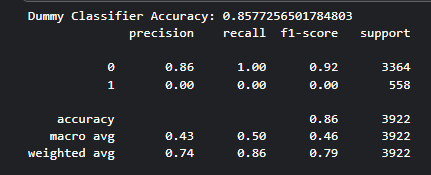

Here below I'm selecting 3 models to train and figure out which works well on validation data

# Comparing Models, Logistic Regression, LinearSVC, SGDClassifier

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import time
from sklearn.metrics import classification_report as cr

# ... (Your existing code for feature engineering and transformations) ...


# Model Comparison (Logistic Regression, LinearSVC, SGDClassifier)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LinearSVC": LinearSVC(random_state=42, max_iter=1000),
    "SGDClassifier": SGDClassifier(loss='hinge', random_state=42),
}

results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_trf, y_train)
    end_time = time.time()
    train_acc = accuracy_score(y_train, model.predict(X_train_trf))
    val_acc = accuracy_score(y_val, model.predict(X_val_trf))
    cv_scores = cross_val_score(model, X_train_trf, y_train, cv=5)
    results[name] = {
        "training_accuracy": train_acc,
        "validation_accuracy": val_acc,
        "cross_val_mean": cv_scores.mean(),
        "cross_val_std": cv_scores.std(),
        "training_time": end_time - start_time,
        "classification_report": cr(y_val, model.predict(X_val_trf))
    }
    print(f"{name} - Training time: {end_time - start_time:.4f} seconds")
    print(f"{name} - Train Accuracy: {train_acc}")
    print(f"{name} - Validation Accuracy: {val_acc}")
    print(f"{name} Classification Report:\n{cr(y_val, model.predict(X_val_trf))}")
    print("-" * 30)


# Analyze and compare results
for name, metrics in results.items():
  print(f"Model: {name}")
  for metric_name, value in metrics.items():
      print(f"  {metric_name}: {value}")
  print("-" * 30)

Logistic Regression - Training time: 0.2884 seconds
Logistic Regression - Train Accuracy: 0.8588512000906798
Logistic Regression - Validation Accuracy: 0.8676695563488016
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3364
           1       0.58      0.25      0.35       558

    accuracy                           0.87      3922
   macro avg       0.73      0.61      0.64      3922
weighted avg       0.84      0.87      0.84      3922

------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC - Training time: 5.8600 seconds
LinearSVC - Train Accuracy: 0.8577743772847063
LinearSVC - Validation Accuracy: 0.8656297807241203
LinearSVC Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      3364
           1       0.57      0.23      0.32       558

    accuracy                           0.87      3922
   macro avg       0.73      0.60      0.62      3922
weighted avg       0.84      0.87      0.84      3922

------------------------------
SGDClassifier - Training time: 0.3518 seconds
SGDClassifier - Train Accuracy: 0.8606081215109525
SGDClassifier - Validation Accuracy: 0.8684344722080571
SGDClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3364
           1       0.56      0.36      0.44       558

    accuracy                           0.87      3922
   macro avg       0.73      0.66      0.68      3922
weight

Model: *Logistic Regression*

  training_accuracy: 0.8588512000906798

    validation_accuracy: 0.8676695563488016
  
  cross_val_mean: 0.858652835934633
  
  cross_val_std: 0.001024300205254623
  8
  training_time: 0.2766373157501220712207

Model: *LinearSVC*

  training_accuracy: 0.8577743772847063
    validation_accuracy: 0.8656297807241203
  
  cross_val_mean: 0.8571509619299238
  
  cross_val_std: 0.001499687047601299
  8
  training_time: 8.059751987457275

Model: *SGDClassifier*
 
   training_accuracy: 0.860608121510952
  5
  validation_accuracy: 0.8684344722080571
  
  cross_val_mean: 0.8603247538673571
  
  cross_val_std: 0.00107961030833883
  1
  training_time: 0.437132835388183657275371328353881836

# Doing Imputations on test dataset

In [46]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the specified columns
test_df[['job', 'education', 'contact']] = imputer.fit_transform(test_df[['job', 'education', 'contact']])

In [47]:
test_df['month_last_contact'] = pd.to_datetime(test_df['last contact date']).dt.month
test_df['year_last_contact'] = pd.to_datetime(test_df['last contact date']).dt.year
for column in ['default', 'housing', 'loan']:
  test_df[column] = test_df[column].map({'yes': 1, 'no': 0})
test_df['poutcome'] = test_df['poutcome'].fillna('unknown')
test_df[['job', 'education', 'contact']] = imputer.fit_transform(test_df[['job', 'education', 'contact']])
test_df = test_df.drop(['last contact date'], axis=1)

# LinearSVC with Hyperparameter Tuning

In [48]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report as cr

# Hyperparameter tuning for LinearSVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],  # 'l1' requires liblinear solver
    'dual': [False],          # Dual=False for l1 penalty
    'max_iter': [1000, 5000, 10000]
}

svc_classifier = LinearSVC(random_state=42, loss='squared_hinge') # Use squared_hinge loss for l2 penalty
grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_trf, y_train)

print("Best hyperparameters for LinearSVC:", grid_search_svc.best_params_)
print("Best accuracy for LinearSVC:", grid_search_svc.best_score_)

best_svc_model = grid_search_svc.best_estimator_
svc_predictions = best_svc_model.predict(X_val_trf)
print(cr(y_val, svc_predictions))'''

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import classification_report as cr\n\n# Hyperparameter tuning for LinearSVC\nparam_grid_svc = {\n    \'C\': [0.1, 1, 10],\n    \'penalty\': [\'l1\', \'l2\'],  # \'l1\' requires liblinear solver\n    \'dual\': [False],          # Dual=False for l1 penalty\n    \'max_iter\': [1000, 5000, 10000]\n}\n\nsvc_classifier = LinearSVC(random_state=42, loss=\'squared_hinge\') # Use squared_hinge loss for l2 penalty\ngrid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv=5, scoring=\'accuracy\')\ngrid_search_svc.fit(X_train_trf, y_train)\n\nprint("Best hyperparameters for LinearSVC:", grid_search_svc.best_params_)\nprint("Best accuracy for LinearSVC:", grid_search_svc.best_score_)\n\nbest_svc_model = grid_search_svc.best_estimator_\nsvc_predictions = best_svc_model.predict(X_val_trf)\nprint(cr(y_val, svc_predictions))'

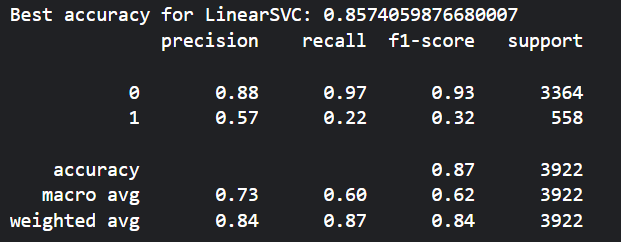

In [49]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report as cr
#import pandas as pd


#param_grid_svc = {
#    'C': [0.1, 1, 10],
 #   'penalty': ['l2'],  # Use 'l2' penalty
  #  'loss': ['squared_hinge'], # Use squared_hinge loss for l2 penalty
   # 'dual': [False],
    #'max_iter': [1000, 5000]
#}

#svc_classifier = LinearSVC(random_state=42)
#grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv=5, scoring='accuracy')
#grid_search_svc.fit(X_train_trf, y_train)

#print("Best hyperparameters for LinearSVC:", grid_search_svc.best_params_)
#print("Best accuracy for LinearSVC:", grid_search_svc.best_score_)

#best_svc_model = grid_search_svc.best_estimator_
#test_transform = pipe.transform(test_df)
#y_pred = best_svc_model.predict(test_transform)


#y_pred_mapped = pd.Series(y_pred).map({0: 'no', 1: 'yes'})


#prediction_df = pd.DataFrame({
 #   'id': test_df.index,
  #  'target': y_pred_mapped})



#prediction_df.to_csv('/kaggle/working/submission.csv', index=False)


# Linear SVC: 0.61585

In [50]:
'''from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report as cr

# Corrected hyperparameter grid for SGDClassifier
param_grid_sgd = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],  # Corrected 'log' to 'log_loss'
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 5000]
}

# Initialize SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=5, scoring='accuracy')
grid_search_sgd.fit(X_train_selected, y_train)

# Display best parameters and accuracy
print("Best hyperparameters for SGDClassifier:", grid_search_sgd.best_params_)
print("Best accuracy for SGDClassifier:", grid_search_sgd.best_score_)

# Evaluate the best model on validation data
best_sgd_model = grid_search_sgd.best_estimator_
sgd_predictions = best_sgd_model.predict(X_val_selected)
print(cr(y_val, sgd_predictions))'''

'from sklearn.linear_model import SGDClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import classification_report as cr\n\n# Corrected hyperparameter grid for SGDClassifier\nparam_grid_sgd = {\n    \'loss\': [\'hinge\', \'log_loss\', \'modified_huber\'],  # Corrected \'log\' to \'log_loss\'\n    \'penalty\': [\'l2\', \'l1\', \'elasticnet\'],\n    \'alpha\': [0.0001, 0.001, 0.01],\n    \'max_iter\': [1000, 5000]\n}\n\n# Initialize SGDClassifier\nsgd_classifier = SGDClassifier(random_state=42)\n\n# Perform GridSearchCV for hyperparameter tuning\ngrid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=5, scoring=\'accuracy\')\ngrid_search_sgd.fit(X_train_selected, y_train)\n\n# Display best parameters and accuracy\nprint("Best hyperparameters for SGDClassifier:", grid_search_sgd.best_params_)\nprint("Best accuracy for SGDClassifier:", grid_search_sgd.best_score_)\n\n# Evaluate the best model on validation data\nbest_sgd_model = grid_search_sgd.

In [51]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import classification_report as cr
#from sklearn.linear_model import SGDClassifier
#import pandas as pd

# Hyperparameter tuning for SGDClassifier
#param_grid_sgd = {
   # 'loss': ['hinge', 'log_loss', 'modified_huber'],
    #'penalty': ['l2', 'l1', 'elasticnet'],
    #'alpha': [0.0001, 0.001, 0.01],
    #'max_iter': [1000, 5000]
#}

#sgd_classifier = SGDClassifier(random_state=42)
#grid_search_sgd = GridSearchCV(sgd_classifier, param_grid_sgd, cv=5, scoring='accuracy')
#grid_search_sgd.fit(X_train_trf, y_train)

#print("Best hyperparameters for SGDClassifier:", grid_search_sgd.best_params_)
#print("Best accuracy for SGDClassifier:", grid_search_sgd.best_score_)

#best_sgd_model = grid_search_sgd.best_estimator_

# Transform test data
#test_transform = pipe.transform(test_df)

# Make predictions
#y_pred = best_sgd_model.predict(test_transform)


#y_pred_mapped = pd.Series(y_pred).map({0: 'no', 1: 'yes'})


#prediction_df = pd.DataFrame({
  # 'id': test_df.index,
  # 'target': y_pred_mapped})



#prediction_df.to_csv('/kaggle/working/submission.csv', index=False)


# SGDClassifier: 0.63127

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import classification_report as cr



xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_selected, y_train)
xgb_predictions = xgb_classifier.predict(X_val_selected)
xgb_accuracy = accuracy_score(y_val, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(y_val, xgb_predictions))

results["XGBoost"] = xgb_accuracy

XGBoost Accuracy: 0.8635900050994391
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3364
           1       0.53      0.39      0.45       558

    accuracy                           0.86      3922
   macro avg       0.72      0.66      0.68      3922
weighted avg       0.85      0.86      0.85      3922



In [53]:
!pip install scikit-optimize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report as cr
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from skopt import BayesSearchCV

# Define the parameter grid for Bayesian optimization
param_grid = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (50, 200),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0)
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Create the Bayesian optimization object
opt = BayesSearchCV(
    xgb_classifier,
    param_grid,
    n_iter=30,  # Number of iterations
    cv=3,        # Number of cross-validation folds
    n_jobs=-1,   # Use all available cores
    verbose=1,
    random_state=42
)

# Fit the Bayesian optimization to the data
opt.fit(X_train_selected, y_train)

# Get the best parameters and the best score
print("Best parameters:", opt.best_params_)
print("Best score:", opt.best_score_)

# Evaluate the best model on the validation set
best_xgb_model = opt.best_estimator_
best_xgb_predictions = best_xgb_model.predict(X_val_selected)
best_xgb_accuracy = accuracy_score(y_val, best_xgb_predictions)

print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")
print(classification_report(y_val, best_xgb_predictions))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

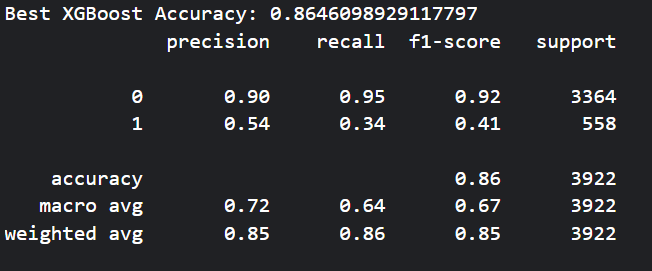

In [54]:
'''from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report as cr
import time

# Apply the best preprocessor (identified earlier) to the entire training data
X_transform = pipe.transform(x)

# Apply the same preprocessor to the test data
test_transform = pipe.transform(test_df)

# Apply feature selection to both transformed datasets
X_transform_selected = SelectKBest_selector.transform(X_transform)
test_transform_selected = SelectKBest_selector.transform(test_transform)


# Train the best XGBoost model on the entire selected training data
best_xgb_model.fit(X_transform_selected, y)

# Make predictions on the test data using the best XGBoost model
y_pred = best_xgb_model.predict(test_transform_selected)
y_pred_mapped = pd.Series(y_pred).map({0: 'no', 1: 'yes'})


prediction_df = pd.DataFrame({
   'id': test_df.index,
   'target': y_pred_mapped})
prediction_df.to_csv('/kaggle/working/submission.csv', index=False)'''

"from skopt import BayesSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.svm import LinearSVC\nfrom sklearn.linear_model import SGDClassifier, LogisticRegression\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import classification_report as cr\nimport time\n\n# Apply the best preprocessor (identified earlier) to the entire training data\nX_transform = pipe.transform(x)\n\n# Apply the same preprocessor to the test data\ntest_transform = pipe.transform(test_df)\n\n# Apply feature selection to both transformed datasets\nX_transform_selected = SelectKBest_selector.transform(X_transform)\ntest_transform_selected = SelectKBest_selector.transform(test_transform)\n\n\n# Train the best XGBoost model on the entire selected training data\nbest_xgb_model.fit(X_transform_selected, y)\n\n# Make predictions on the test data using the best XGBoost model\ny_pred = best_xgb_model.predict(test_transform_selected)\ny_pred_mapped = pd.Series(y_pred).ma

# XGBClassifier Score: 0.69655 

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
rf_predictions = rf_classifier.predict(X_val_selected)

# Calculate accuracy
rf_accuracy = accuracy_score(y_val, rf_predictions)

# Print accuracy and classification report
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_val, rf_predictions))

# Store results
results["Random Forest"] = rf_accuracy


Random Forest Accuracy: 0.8656297807241203
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3364
           1       0.54      0.34      0.42       558

    accuracy                           0.87      3922
   macro avg       0.72      0.65      0.67      3922
weighted avg       0.85      0.87      0.85      3922



# f1 macro score avg
Dummy Classifier: 0.46
Logistic Regression: 0.64
Linear SVC: 0.62
SGDC Classifier: 0.68
XGB Classifier: 0.67
Random Forest Classifier: 0.67


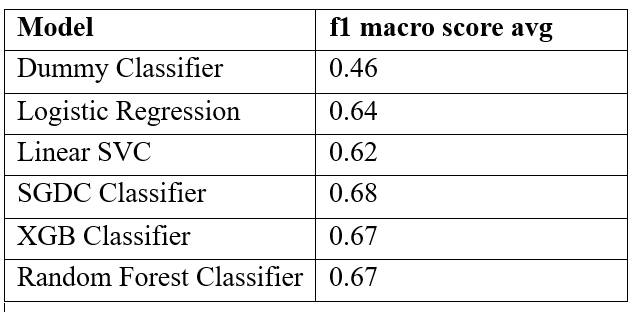

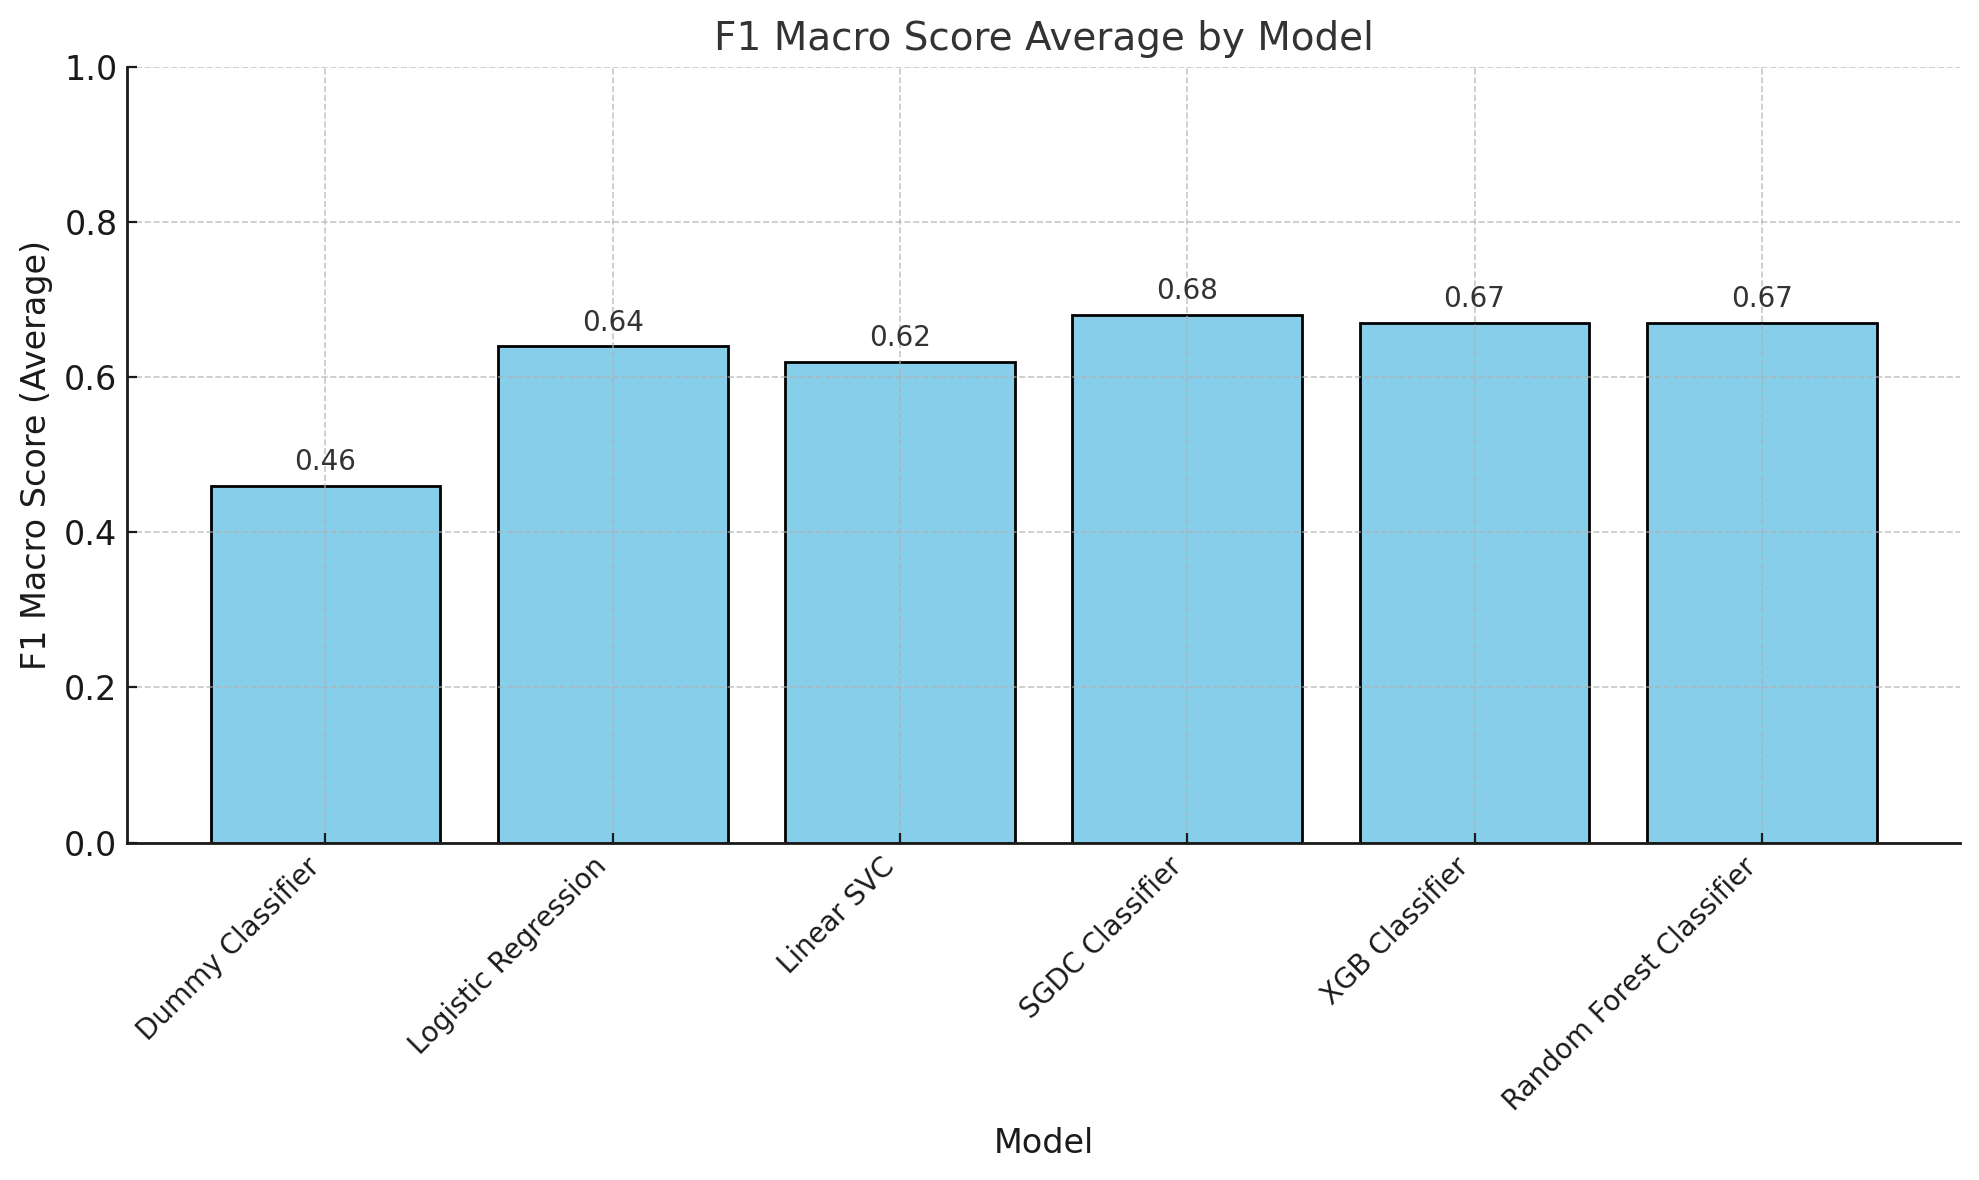
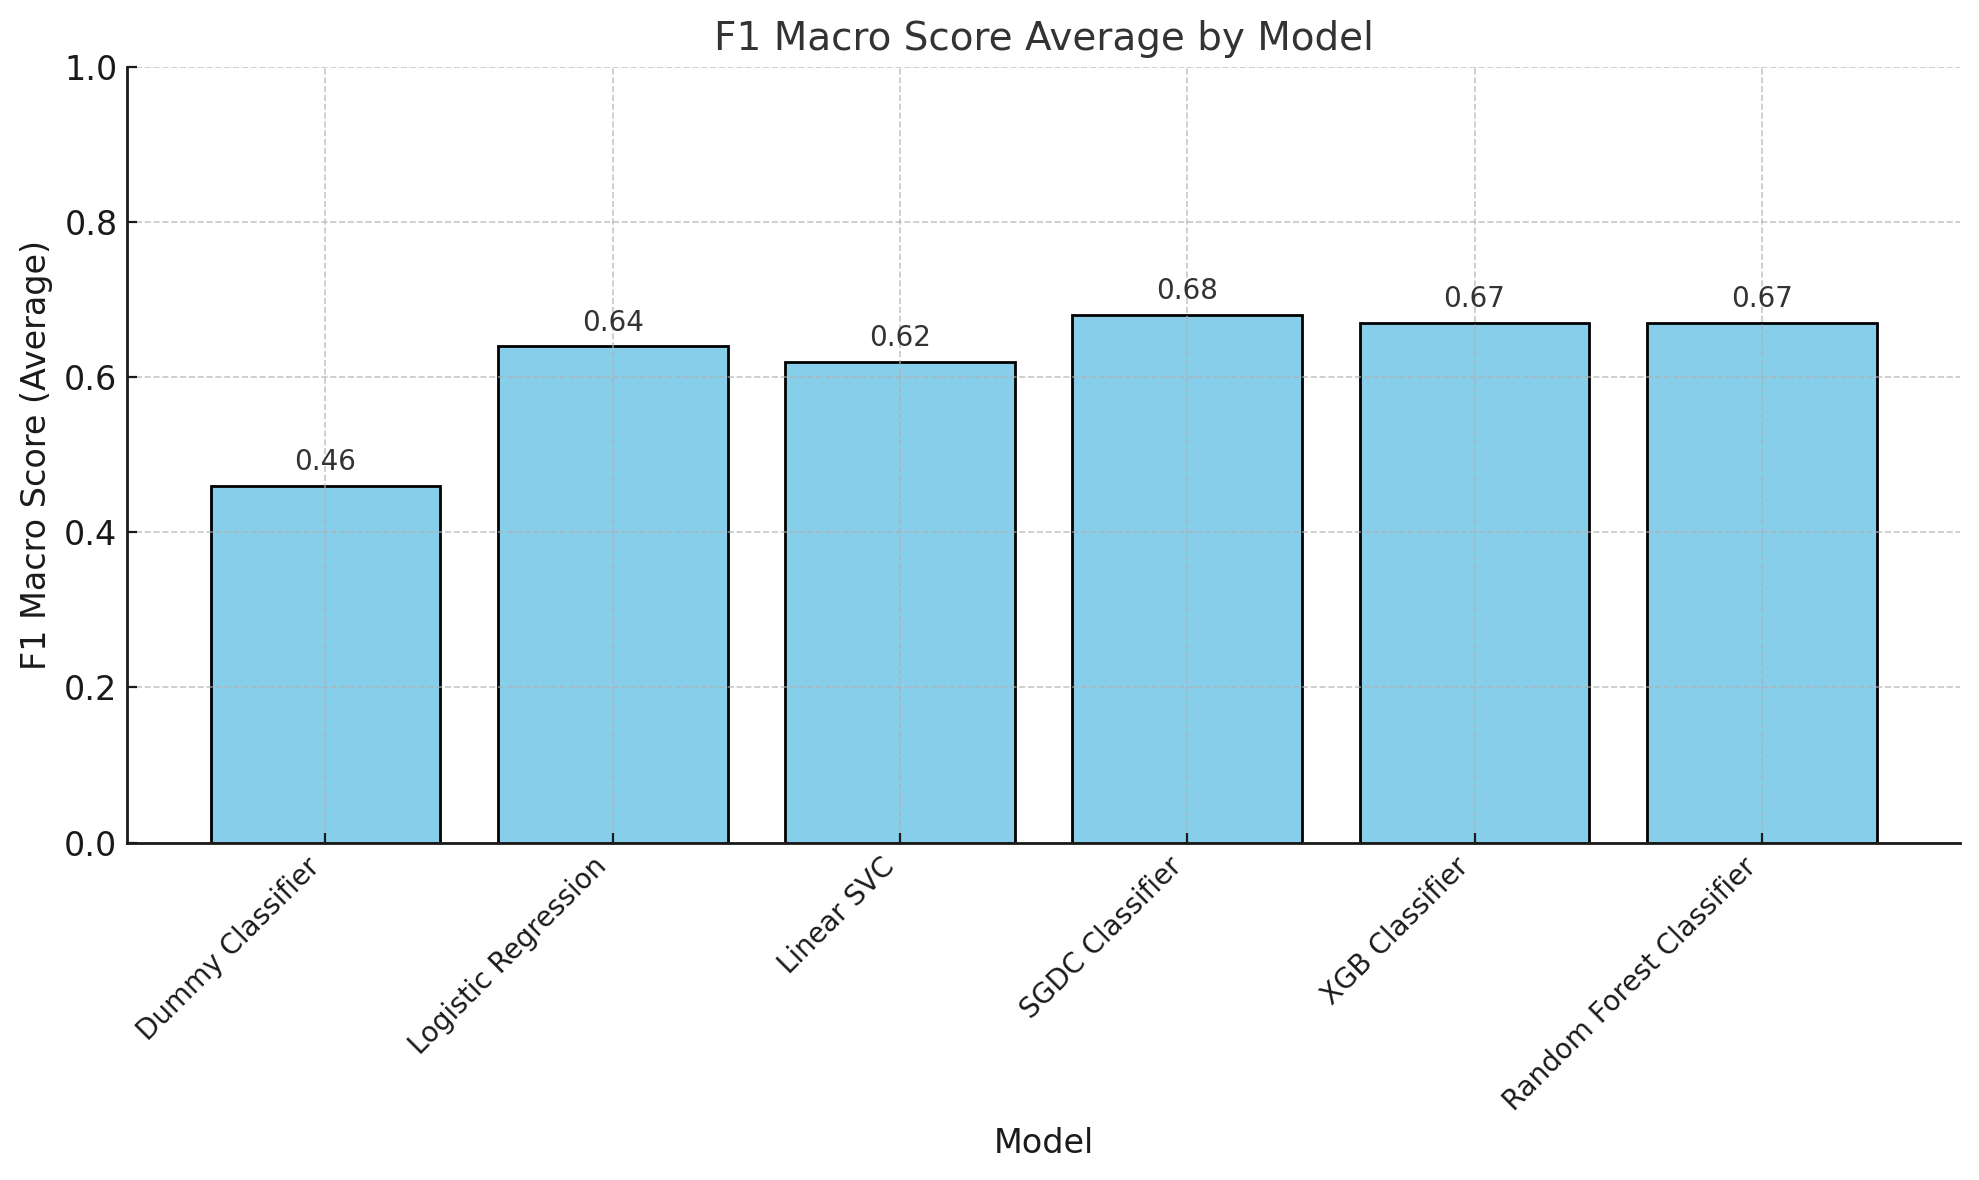

# Final Model: Random Forest Classifier

In [56]:
#Final Model: Random Forest Classifier

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import datetime

In [58]:
train_df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_df=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [59]:
train_df['month_last_contact'] = pd.to_datetime(train_df['last contact date']).dt.month
train_df['year_last_contact'] = pd.to_datetime(train_df['last contact date']).dt.year

In [60]:
for column in ['default', 'housing', 'loan', 'target']:
  train_df[column] = train_df[column].map({'yes': 1, 'no': 0})

In [61]:
train_df['poutcome'] = train_df['poutcome'].fillna('unknown')

In [62]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train_df[['job', 'education', 'contact']] = imputer.fit_transform(train_df[['job', 'education', 'contact']])

In [63]:
train_df = train_df.drop(['last contact date'], axis=1)

In [64]:
y= train_df.target.copy()
x= train_df.drop('target', axis=1).copy()

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(x, y, test_size=0.1, random_state=1)

In [66]:
from sklearn.compose import make_column_selector as mcs
num_sel = mcs(dtype_exclude='object')
cat_sel = mcs(dtype_include='object')

In [67]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Set sparse_output to False
])

preprocessor = ColumnTransformer([
    ('numerical', num_pipeline, num_sel(X_train)),
    ('categorical', cat_pipeline, cat_sel(X_train))
])
pipe= Pipeline([('preprocessor', preprocessor)]) # Use preprocessor here
pipe.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'default', 'balance',
                                                   'housing', 'loan',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous',
                                                   'month_last_contact',
                                                   'year_last_contact']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'poutcome'])]))])

In [68]:
X_train_trf = pipe.transform(X_train)
X_val_trf = pipe.transform(X_val)

In [69]:
X_train_trf.shape

(35289, 34)

In [70]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
SelectKBest_selector = SelectKBest(mutual_info_classif, k=20)
SelectKBest_selector.fit(X_train_trf, y_train)

SelectKBest(k=20, score_func=<function mutual_info_classif at 0x7fcd8c253640>)

In [71]:
SelectKBest_selector.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x8', 'x9', 'x12', 'x18',
       'x19', 'x23', 'x24', 'x26', 'x28', 'x29', 'x31', 'x32', 'x33'],
      dtype=object)

In [72]:
X_train_selected = SelectKBest_selector.transform(X_train_trf)
X_val_selected = SelectKBest_selector.transform(X_val_trf)

In [73]:
def selector_method(selector, X_train_trf, y_train):
    selector.fit(X_train_trf, y_train)
    X_train_selected = selector.transform(X_train_trf)
    X_val_selected = selector.transform(X_val_trf)
    return X_train_selected, X_val_selected

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.8706395636101336
Validation Accuracy: 0.8699643039265681


In [75]:
test_df['month_last_contact'] = pd.to_datetime(test_df['last contact date']).dt.month
test_df['year_last_contact'] = pd.to_datetime(test_df['last contact date']).dt.year
for column in ['default', 'housing', 'loan']:
  test_df[column] = test_df[column].map({'yes': 1, 'no': 0})
test_df['poutcome'] = test_df['poutcome'].fillna('unknown')
test_df[['job', 'education', 'contact']] = imputer.transform(test_df[['job', 'education', 'contact']])
test_df = test_df.drop(['last contact date'], axis=1)

test_transform = pipe.transform(test_df)
test_transform_selected = SelectKBest_selector.transform(test_transform)

# Predict on the test data using the best model
y_pred = best_rf_classifier.predict(test_transform_selected)
y_pred_mapped = pd.Series(y_pred).map({0: 'no', 1: 'yes'})

# Create the submission DataFrame
prediction_df = pd.DataFrame({
    'id': test_df.index,
    'target': y_pred_mapped
})

# Save the predictions to a CSV file
prediction_df.to_csv('/kaggle/working/submission.csv', index=False)

# Final model score: 0.71281